In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import neural_network
import time
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt

## Data Creation

In [2]:
percentageTest = .2 # percentage

# Function to return gaussian data with given means, covariances, and number of points
# Returns 4 parameters: trainingData, testingData, trainingLabels, testingLabels
def generateData(mean1, mean2, cov1, cov2, pointsPerLabel):
    gauss1 = np.random.multivariate_normal(mean1, cov1, pointsPerLabel)
    labels1 = np.full(pointsPerLabel, -1, dtype=np.float64)
    gauss2 = np.random.multivariate_normal(mean2, cov2, pointsPerLabel)
    labels2 = np.full(pointsPerLabel, 1, dtype=np.float64)

    dataset = np.concatenate((gauss1, gauss2), axis=0)
    labels = np.concatenate((labels1, labels2), axis=0)

    return train_test_split(dataset, labels, test_size=percentageTest, random_state=42)

### Normal Gaussian 2 Clusters

In [11]:
mean1 = [0,0]
mean2 = [3,3]
cov1 = [[1,0],[0,1]]
cov2 = [[1,0],[0,1]]
pointsPerLabel = 100

dataTrainGauss, dataTestGauss, labelsTrainGauss, labelsTestGauss = generateData(mean1, mean2, cov1, cov2, pointsPerLabel)

# Plotting

In [36]:
granularityOfMesh = .02

def plotBoundary(model, data, labels):
    xCoord = data[:, 0]
    yCoord = data[:, 1]
    x_min, x_max = xCoord.min() - 1, xCoord.max() + 1
    y_min, y_max = yCoord.min() - 1, yCoord.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02)) # Create x and y values on a grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # Convert 2 1-D arrays into (2 column) 2-D array to pass to predict
    Z = Z.reshape(xx.shape) # Back to a grid format so it can be plotted

#     fig, ax = plt.subplots()
#     out = 
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(xCoord, yCoord, c=labels, cmap=plt.cm.coolwarm, s=20)
    plt.axis([xx.min(), xx.max(), yy.min(), yy.max()])
#     plt.set_ylim()
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("Test 1")

# Timing

In [5]:
def fitModel(model, trainingData, trainingLabels):
    start = time.time()
    model.fit(trainingData, trainingLabels)
    end = time.time()
    print("Time to fit " + str(end - start))

In [6]:
def predictModel(model, testData):
    start = time.time()
    predictions = model.predict(testData)
    end = time.time()
    print("Time to predict " + str(end - start))
    return predictions

# KNN
### Euclidean distance, brute force method
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Time to fit 0.0009818077087402344
Time to predict 0.002002716064453125
0.975


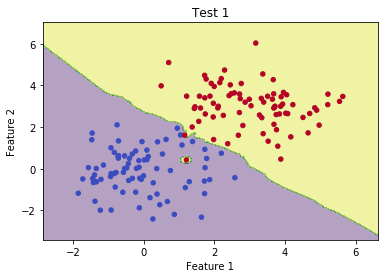

In [37]:
knnModel=neighbors.KNeighborsClassifier(algorithm='brute', weights='distance')
fitModel(knnModel, dataTrainGauss, labelsTrainGauss)
predictions = predictModel(knnModel, dataTestGauss)
knnAccuracy = accuracy_score(labelsTestGauss.tolist(), predictions)
print(knnAccuracy)
plotBoundary(knnModel, dataTrainGauss, labelsTrainGauss)

# Naive Bayes
### Gaussian Assumption
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

Time to fit 0.0010027885437011719
Time to predict 0.0
0.975


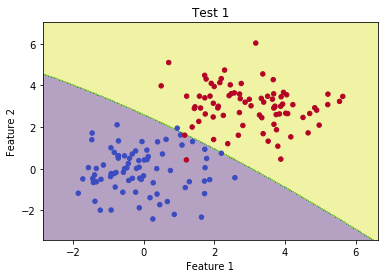

In [40]:
nbModel=naive_bayes.GaussianNB()
fitModel(nbModel, dataTrainGauss, labelsTrainGauss)
predictions = predictModel(nbModel, dataTestGauss)
nbAccuracy = accuracy_score(labelsTestGauss.tolist(), predictions)
print(nbAccuracy)
plotBoundary(nbModel, dataTrainGauss, labelsTrainGauss)

$$\begin{eqnarray}
\min_{x}\frac{1}{2} x^{T}Px - q^{T}x \nonumber \\\
\textrm{s.t.}\quad Gx \preceq h \\\
\textrm{and}\quad Ax = b
\end{eqnarray}$$

# Support Vector Classification
### Linear Kernel, RBF Kernel
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

Time to fit 0.001001119613647461
Time to predict 0.0
0.975


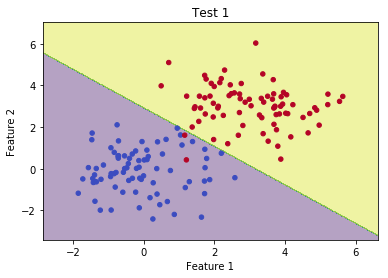

In [42]:
svmLinearModel = svm.SVC(kernel='linear')
fitModel(svmLinearModel, dataTrainGauss, labelsTrainGauss)
predictions = predictModel(svmLinearModel, dataTestGauss)
svmLinearAccuracy = accuracy_score(labelsTestGauss.tolist(), predictions)
print(svmLinearAccuracy)
plotBoundary(svmLinearModel, dataTrainGauss, labelsTrainGauss)

Time to fit 0.0
Time to predict 0.0
0.975


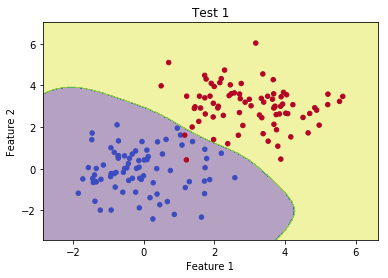

In [44]:
svmRBFModel = svm.SVC(kernel='rbf')
fitModel(svmRBFModel, dataTrainGauss, labelsTrainGauss)
predictions = predictModel(svmRBFModel, dataTestGauss)
svmRBFAccuracy = accuracy_score(labelsTestGauss.tolist(), predictions)
print(svmRBFAccuracy)
plotBoundary(svmRBFModel, dataTrainGauss, labelsTrainGauss)

# Neural Network
### Vanilla model
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
http://scikit-learn.org/stable/modules/neural_networks_supervised.html (tutorial)

Time to fit 0.10400557518005371
Time to predict 0.0
0.975


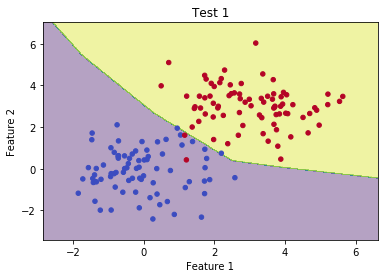

In [46]:
nnModel = neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
fitModel(nnModel, dataTrainGauss, labelsTrainGauss)
predictions = predictModel(nnModel, dataTestGauss)
nnAccuracy = accuracy_score(labelsTestGauss.tolist(), predictions)
print(nnAccuracy)
plotBoundary(nnModel, dataTrainGauss, labelsTrainGauss)